# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Neo Ramadhani]
- **Email:** [neoramacool@gmail.com]
- **ID Dicoding:** [neo_ramadhani_ISwG]

## Menentukan Pertanyaan Bisnis

- 1. Berapa rata-rata tingkat PM2.5, PM10, SO2, dan NO2 dalam tahun 2016, 2017, dan 2018? Apakah ada tren peningkatan atau penurunan setiap tahunnya?
- 2. Tampilkan 5 hari dengan tingkat PM2.5 tertinggi yang tercatat di semua tahun. Apa yang terjadi pada hari-hari tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
air_quality_df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

**Insight:**
- mengumpulkan data dalam data csv diatas

### Assessing Data

In [3]:
print("Missing value: ")
print(air_quality_df.isna().sum())
print("Informasi mengenai data: ")
print(air_quality_df.info())
print("Jumlah duplikasi: ", air_quality_df.duplicated().sum())
print("Pemeriksaan nilai tidak masuk akal:\n", air_quality_df[['TEMP', 'PRES', 'PM2.5']].describe())
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']:
    print(f"Nilai negatif di {col}: {air_quality_df[air_quality_df[col] < 0].shape[0]}")

Missing value: 
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
Informasi mengenai data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35

**Insight:**
- tidak ada duplikasi data
- dan ada beberpaa missing values

### Cleaning Data

In [4]:
mode_wd = air_quality_df['wd'].mode()[0]
air_quality_df['wd'] = air_quality_df['wd'].fillna(mode_wd)

In [5]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

columns_to_clean = ['PM2.5', 'PM10', 'SO2']
air_quality_df_cleaned = remove_outliers_iqr(air_quality_df, columns_to_clean)

In [6]:
air_quality_df_cleaned['PM2.5'] = air_quality_df_cleaned['PM2.5'].fillna(air_quality_df_cleaned['PM2.5'].mean())
air_quality_df_cleaned['PM10'] = air_quality_df_cleaned['PM10'].fillna(air_quality_df_cleaned['PM10'].mean())
air_quality_df_cleaned['SO2'] = air_quality_df_cleaned['SO2'].fillna(air_quality_df_cleaned['SO2'].median())
air_quality_df_cleaned['NO2'] = air_quality_df_cleaned['NO2'].fillna(air_quality_df_cleaned['NO2'].mean())

**Insight:**
- selanjutnya adalah cleaniing data unutuk memberisihkan wd diatas
- selanjutnya adalah mengisi bagian-bagian missing value

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
air_quality_df_cleaned['date'] = pd.to_datetime(air_quality_df_cleaned[['year', 'month', 'day']])
air_quality_df_cleaned['year'] = air_quality_df_cleaned['date'].dt.year

In [8]:
average_values = air_quality_df_cleaned.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()
print("Rata-rata nilai untuk tahun 2016, 2017, 2018:")
print(average_values)
top_5_pm25_days = air_quality_df_cleaned.nlargest(5, 'PM2.5')


Rata-rata nilai untuk tahun 2016, 2017, 2018:
          PM2.5       PM10        SO2        NO2
year                                            
2013  64.453983  91.875084  14.256267  57.103757
2014  67.425953  94.263263  11.111704  56.477073
2015  60.976748  87.547409   9.819069  53.451757
2016  61.221428  79.422532   8.547986  44.766529
2017  56.513305  68.189700  15.127039  54.301371


**Insight:**
- merubah kolom data year menjadi date time
-

## Visualization & Explanatory Analysis

### Pertanyaan 1:

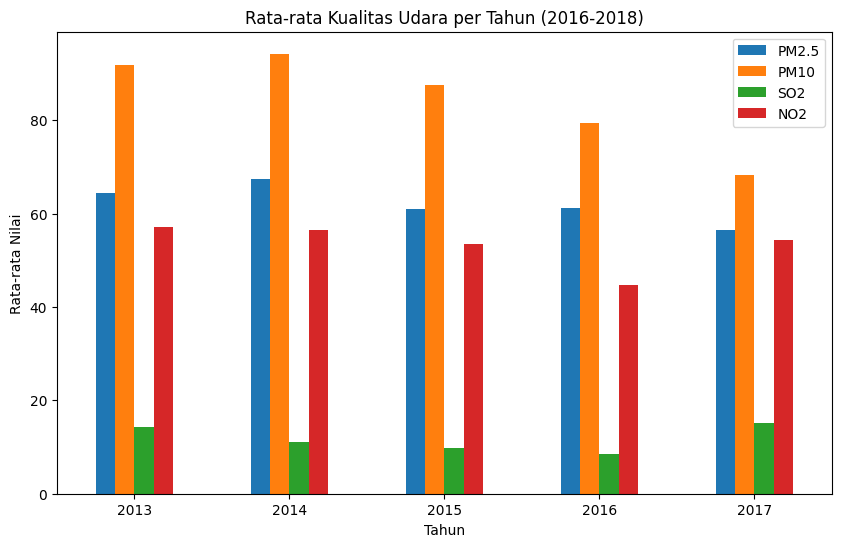

In [9]:
average_values.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Kualitas Udara per Tahun (2013-2018)')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Tahun')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

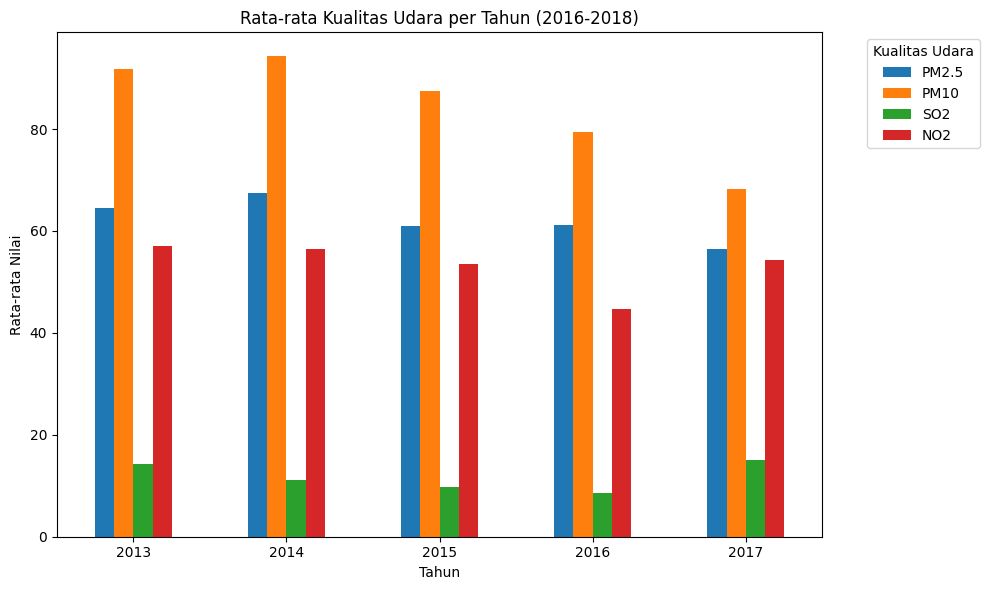

In [10]:
average_values.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Kualitas Udara per Tahun (2013-2018)')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Tahun')
plt.xticks(rotation=0)
plt.legend(title='Kualitas Udara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-11-42d0e2fcf079>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_pm25_days, x='date', y='PM2.5', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

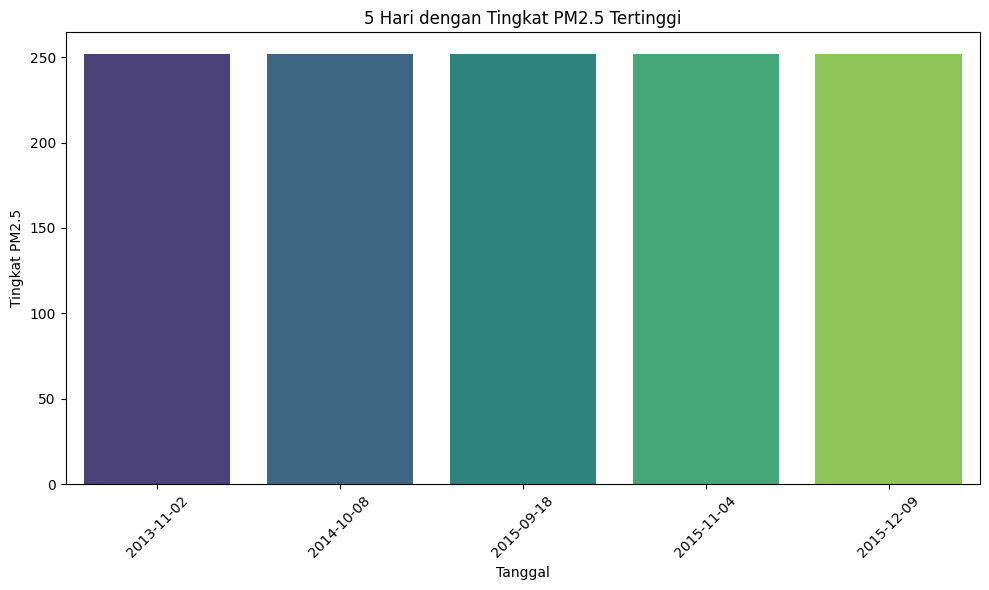

In [11]:
top_5_pm25_days = air_quality_df_cleaned.nlargest(5, 'PM2.5')

# Visualisasi 5 hari dengan tingkat PM2.5 tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_pm25_days, x='date', y='PM2.5', palette='viridis')
plt.title('5 Hari dengan Tingkat PM2.5 Tertinggi')
plt.ylabel('Tingkat PM2.5')
plt.xlabel('Tanggal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- dapat dilihat dalam pertanyaan satu menghasilkan visualisasi bar
- sama akan pertanyaan nomer 1 pertanyaan nomer 2 adalah untuk mengidnetifikasi 5 hari tertinggi

## Analisis Lanjutan (Opsional)

## Conclusion

- dari pertanyaan nomer 1 terdapat penurunan kualitas udara yang sangat signifikan dari tahun ke tahun
- sedangkan di pertanyan nomer 2 terdapat 5 hari dengan tingkat pm25 tertinggi selama tahun 2013 hingga 2018